In [246]:
#탐색적 데이터 분석(EDA: Exploratory Data Analysis)

In [247]:
import pandas as pd
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/gender_submission.csv')

In [248]:
train.shape

(891, 12)

In [249]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [250]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [251]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [252]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [253]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

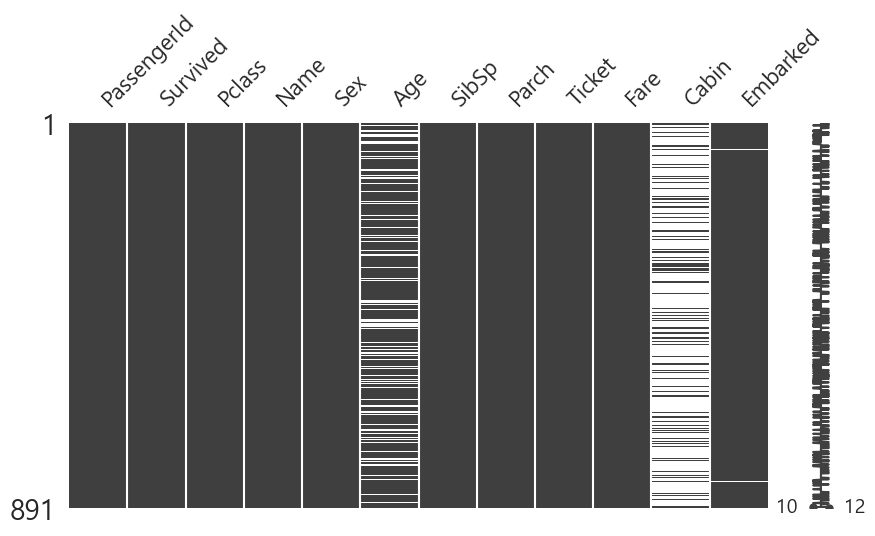

In [254]:
import missingno as msno
msno.matrix(train, figsize=(10, 5))


In [255]:
survived = train.value_counts('Survived')
survived

Survived
0    549
1    342
Name: count, dtype: int64

In [256]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('font', size=10)
plt.rc('axes', unicode_minus=False)

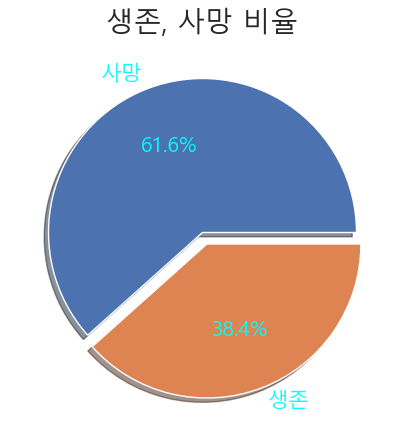

In [257]:
#생존 비율
plt.figure(figsize=(8, 5))
lables = ['사망', '생존']
plt.pie(survived.values, labels=lables, 
        explode=[0, 0.08], shadow=True, autopct='%0.1f%%', textprops={'color':'cyan', 'fontsize':'15'})
plt.title('생존, 사망 비율', size=20)
plt.show()

In [258]:
import seaborn as sns
sns.set_theme(font='Malgun Gothic', style='white') #syle=white, whitegrid, dark, darkgrid, ticks

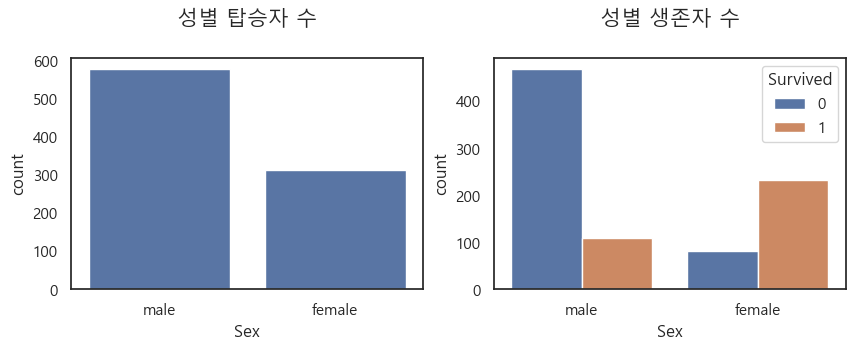

In [259]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].set_title('성별 탑승자 수\n', size=15)
sns.countplot(x='Sex', data=train, ax=axes[0])

axes[1].set_title('성별 생존자 수\n', size=15)
sns.countplot(x='Sex', hue='Survived', data=train, ax=axes[1])
plt.show()

In [260]:
#성별 생존율
sex = train.groupby('Sex').size().to_frame('전체인원')
filt = train['Survived'] == 1
sex_survived = train[filt].groupby('Sex').size().to_frame('생존인원')
merge = sex.merge(sex_survived, on='Sex')
merge['생존율'] = merge['생존인원']/merge['전체인원']
merge

,전체인원,생존인원,생존율
Sex,,,
female,314,233,0.742038
male,577,109,0.188908


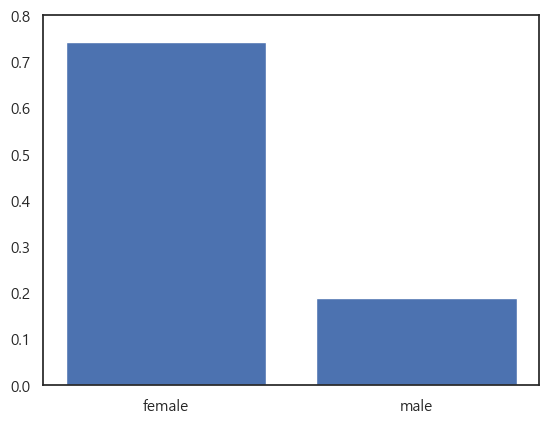

In [261]:
plt.bar(merge.index, merge['생존율'])
plt.ylim(0, 0.8)
plt.show()

In [262]:
pclass = train.groupby('Pclass').size().to_frame('전체인원')
filt = train['Survived'] == 1
pclass_survived = train[filt].groupby('Pclass').size().to_frame('생존인원')
merge = pclass.merge(pclass_survived, on='Pclass')
merge['생존율'] = merge['생존인원'] / merge['전체인원']
merge

,전체인원,생존인원,생존율
Pclass,,,
1,216,136,0.629630
2,184,87,0.472826
3,491,119,0.242363


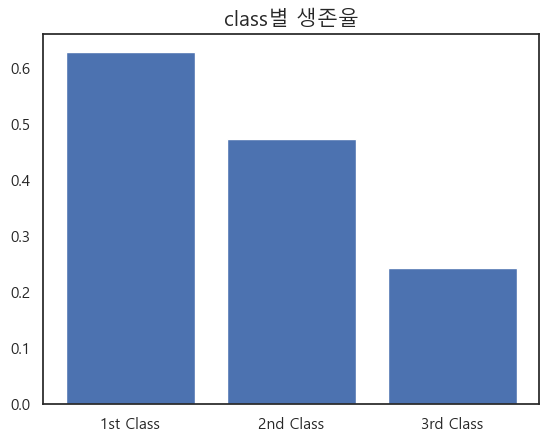

In [263]:
merge.index=['1st Class', '2nd Class', '3rd Class']
plt.bar(merge.index, merge['생존율'])
plt.title('class별 생존율', size=15)
plt.show()

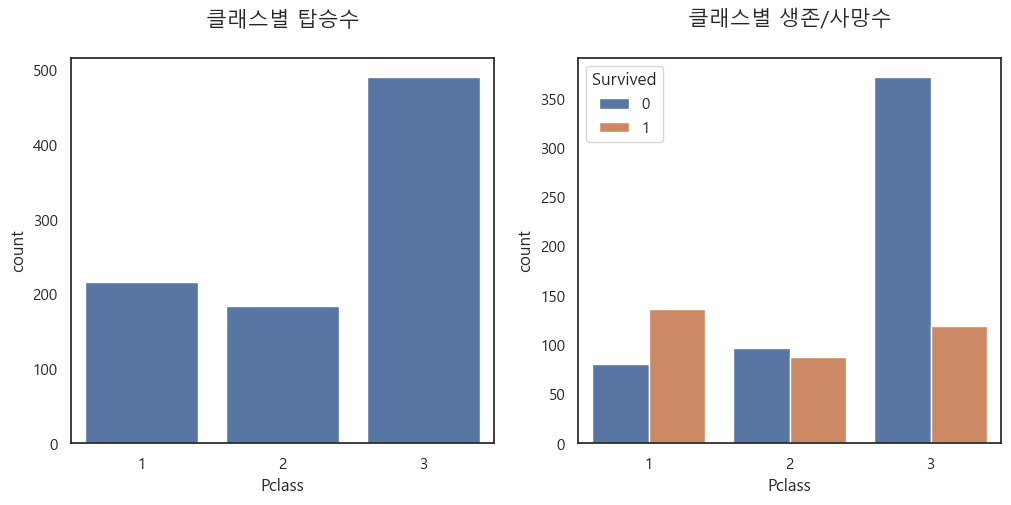

In [264]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].set_title('클래스별 탑승수\n', size=15)
sns.countplot(x='Pclass', data=train,  ax=axes[0])

axes[1].set_title('클래스별 생존/사망수\n', size=15)
sns.countplot(x='Pclass', hue='Survived', data=train, ax=axes[1])
plt.show()

In [265]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

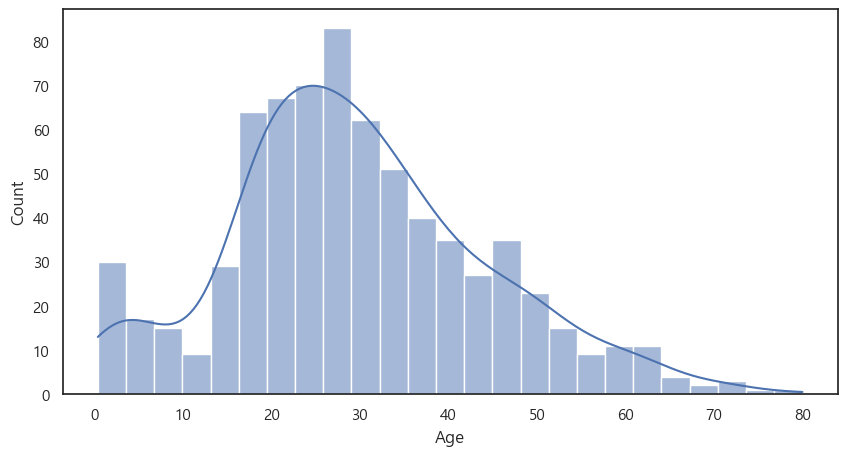

In [266]:
plt.figure(figsize=(10, 5))
sns.histplot(data=train, x='Age', bins=25, kde=True)
plt.show()

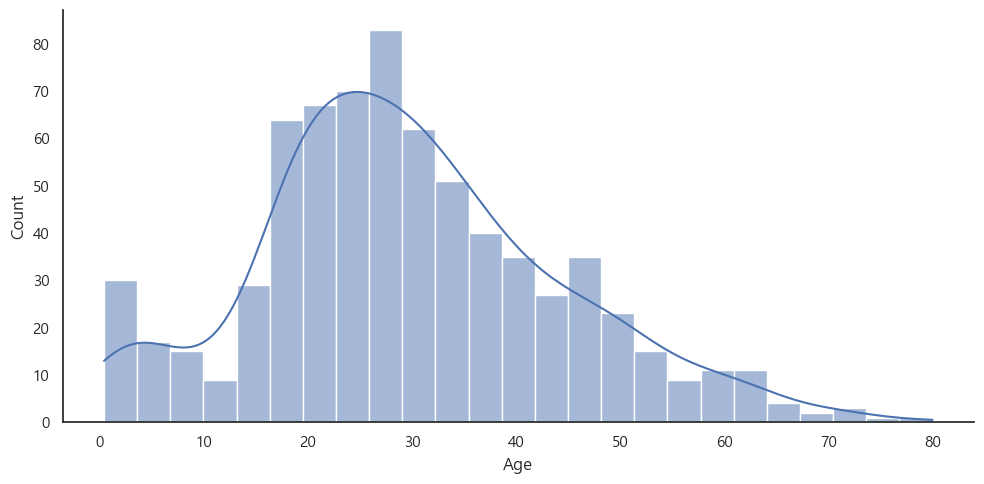

In [267]:
sns.displot(data=train, x='Age', bins=25, height=5, aspect=2, kde=True)
plt.show()

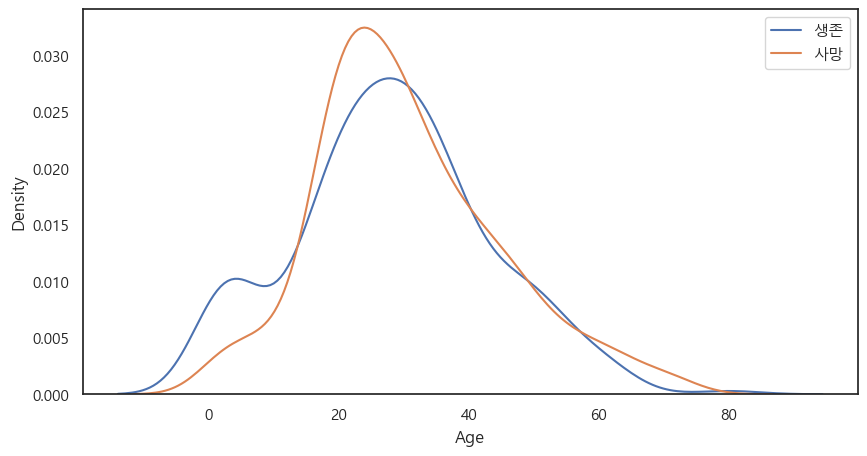

In [268]:
filt = train['Survived'] == 1
survived = train[filt]

filt = train['Survived'] == 0
dead = train[filt]

plt.figure(figsize=(10, 5))
sns.kdeplot(survived['Age'], label='생존')
sns.kdeplot(dead['Age'], label='사망')
plt.legend()
plt.show()


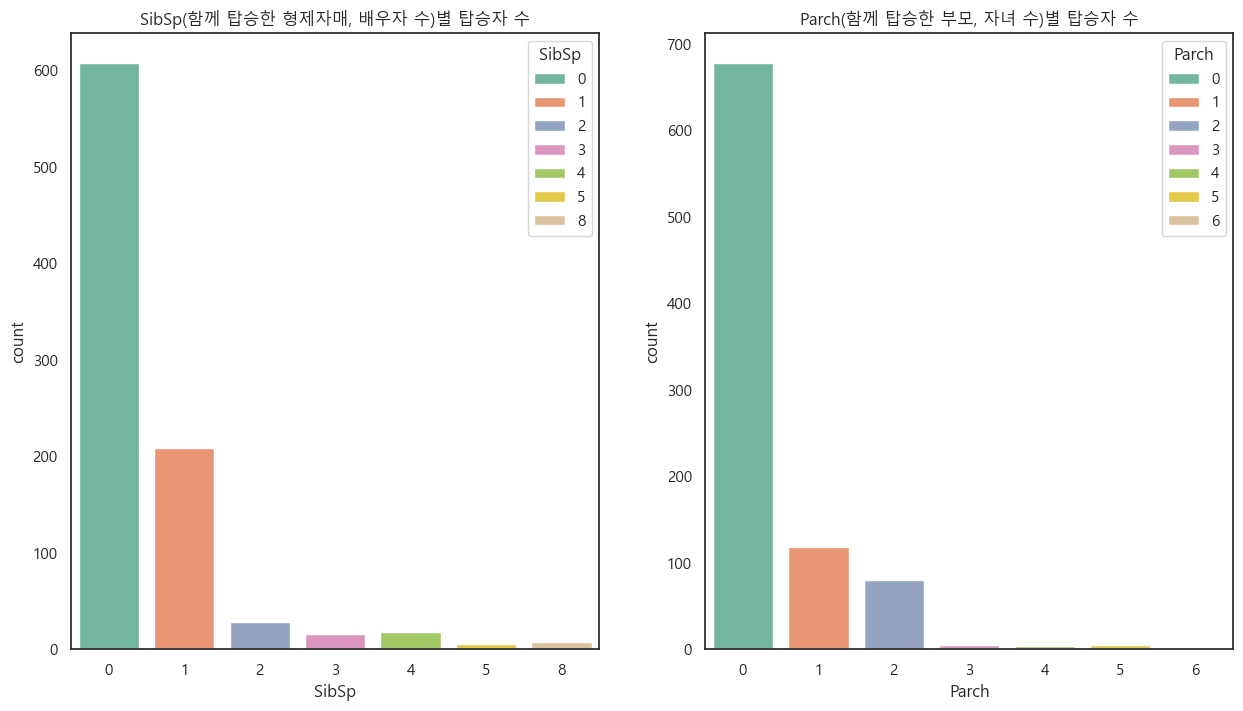

In [269]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

axes[0].set_title('SibSp(함께 탑승한 형제자매, 배우자 수)별 탑승자 수')
sns.countplot(x='SibSp', data=train, ax=axes[0], hue='SibSp', palette='Set2')

axes[1].set_title('Parch(함께 탑승한 부모, 자녀 수)별 탑승자 수')
sns.countplot(x='Parch', data=train, ax=axes[1], hue='Parch', palette='Set2')
plt.show()

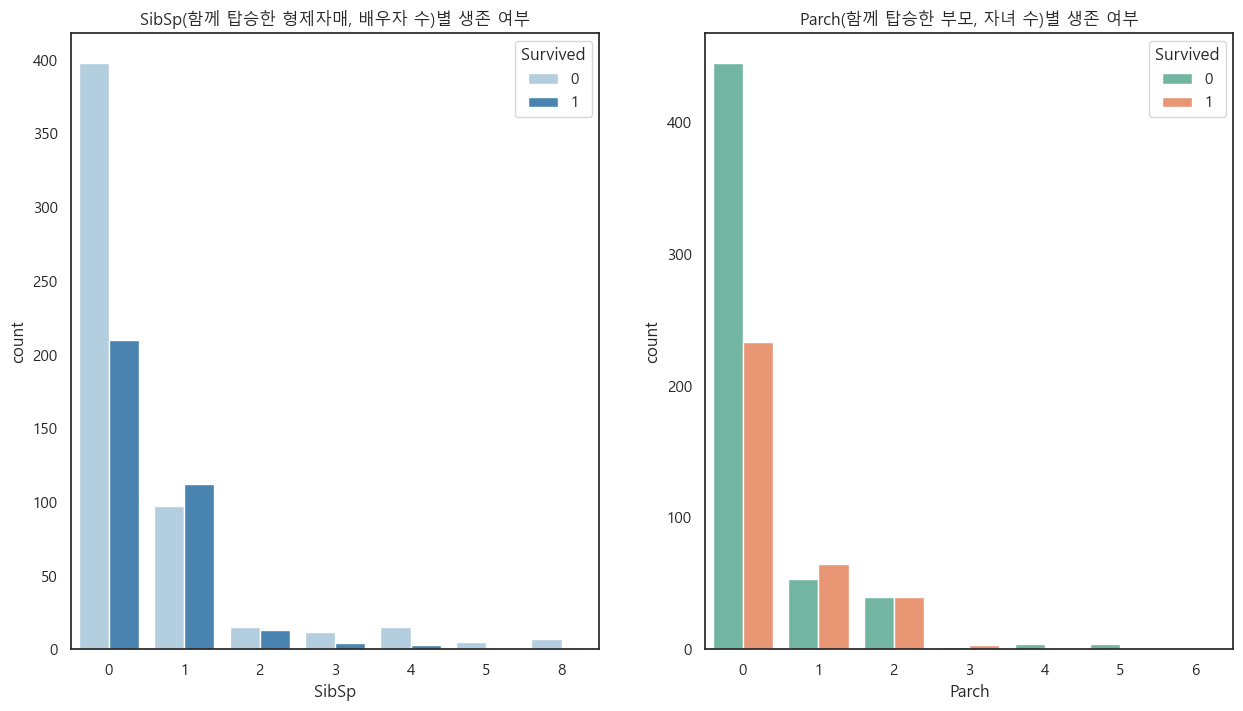

In [270]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
axes[0].set_title('SibSp(함께 탑승한 형제자매, 배우자 수)별 생존 여부')
sns.countplot(x='SibSp', hue='Survived', data=train, ax=axes[0], palette='Blues')

axes[1].set_title('Parch(함께 탑승한 부모, 자녀 수)별 생존 여부')
sns.countplot(x='Parch', hue='Survived', data=train, ax=axes[1], palette='Set2')
plt.show()

In [271]:
sibsp = train.groupby('SibSp').size().to_frame('전체인원')
filt = train['Survived'] == 1
sibsp_survived = train[filt].groupby('SibSp').size().to_frame('생존인원')
merge = sibsp.merge(sibsp_survived, on='SibSp')
merge['생존율'] = merge['생존인원']/merge['전체인원']
merge


,전체인원,생존인원,생존율
SibSp,,,
0,608,210,0.345395
1,209,112,0.535885
2,28,13,0.464286
3,16,4,0.250000
4,18,3,0.166667


In [272]:
parch = train.value_counts('Parch').to_frame('전체인원')
filt = train['Survived'] == 1
parch_survived = train[filt].value_counts('Parch').to_frame('생존인원')
merge = parch.merge(parch_survived, on='Parch')
merge['생존율'] = merge['생존인원'] / merge['전체인원']
merge

,전체인원,생존인원,생존율
Parch,,,
0,678,233,0.343658
1,118,65,0.550847
2,80,40,0.500000
3,5,3,0.600000
5,5,1,0.200000


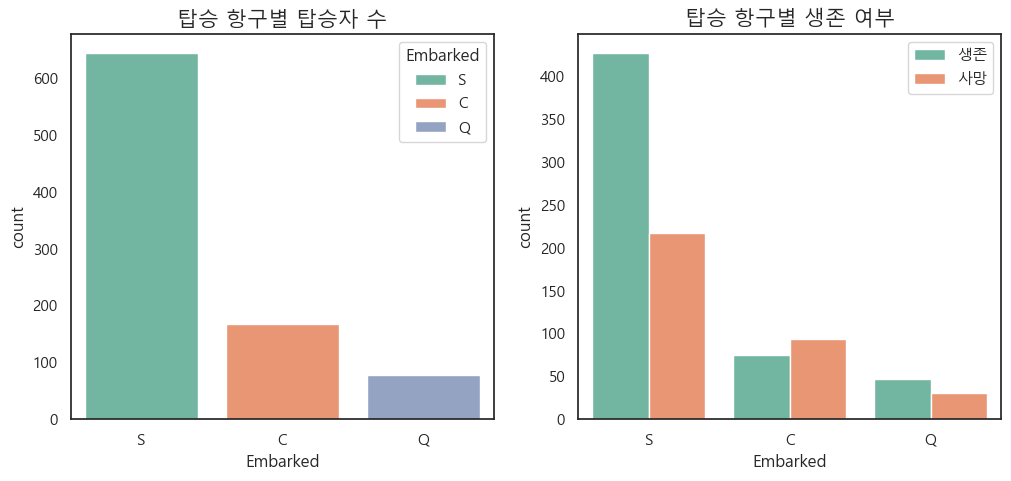

In [273]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].set_title('탑승 항구별 탑승자 수', size=15)
sns.countplot(x='Embarked', data=train, ax=axes[0], hue='Embarked', palette='Set2')
axes[1].set_title('탑승 항구별 생존 여부', size=15)
sns.countplot(x='Embarked', hue='Survived', data=train, ax=axes[1], palette='Set2')
axes[1].legend(labels=['생존', '사망'])
plt.show()


In [274]:
embarked = train.groupby('Embarked').size().to_frame('전체인원')
filt = train['Survived'] == 1
embarked_survived = train[filt].groupby('Embarked').size().to_frame('생존인원')
merge = embarked.merge(embarked_survived, on='Embarked')
merge['생존율'] = merge['생존인원'] / merge['전체인원']
merge

,전체인원,생존인원,생존율
Embarked,,,
C,168,93,0.553571
Q,77,30,0.389610
S,644,217,0.336957


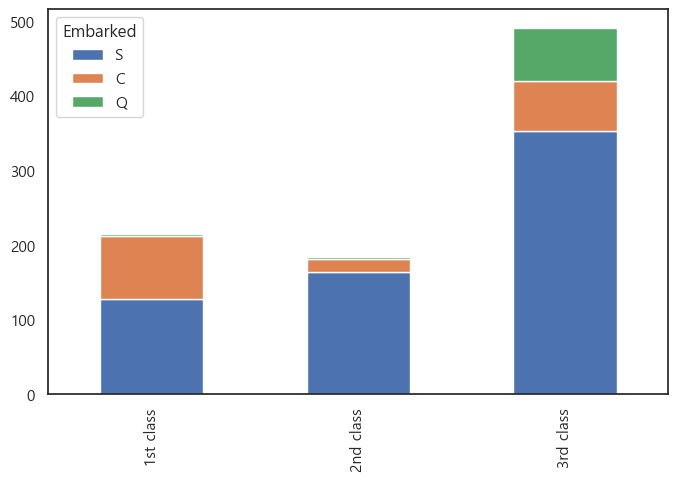

In [275]:
pc1 = train[train['Pclass'] == 1].value_counts('Embarked')
pc2 = train[train['Pclass'] == 2].value_counts('Embarked')
pc3 = train[train['Pclass'] == 3].value_counts('Embarked')
pc = pd.DataFrame([pc1, pc2, pc3])
pc.index = ['1st class', '2nd class', '3rd class']

# plt.bar(pc.index, pc['S'])
# plt.bar(pc.index, pc['C'], bottom=pc['S'])
# plt.bar(pc.index, pc['Q'], bottom=pc['S'] + pc['C'])

fig, ax = plt.subplots(figsize=(8, 5))
pc.plot(kind='bar', stacked=True, ax=ax)
plt.show()

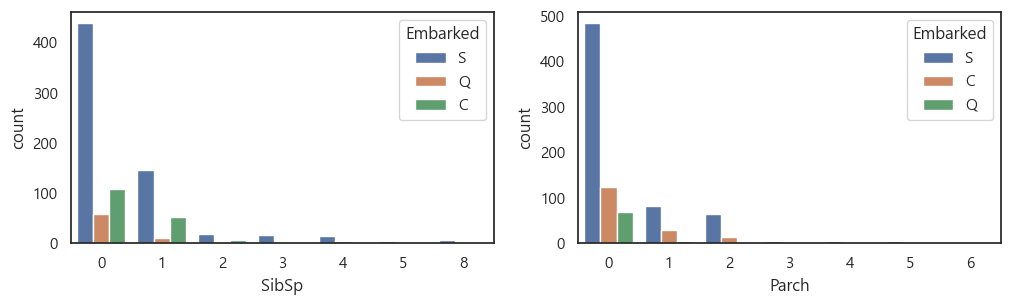

In [276]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
sns.countplot(data=train, x='SibSp', hue='Embarked', ax=axes[0])
sns.countplot(data=train, x='Parch', hue='Embarked', ax=axes[1])
plt.show()

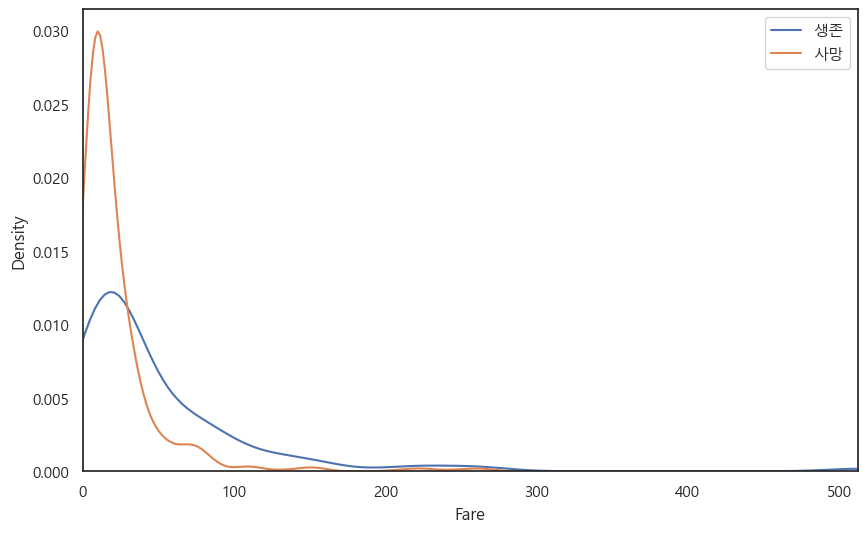

In [280]:
plt.figure(figsize=(10, 6))
filt = train['Survived'] == 1
sns.kdeplot(train[filt]['Fare'], label='생존')

filt = ~filt
sns.kdeplot(train[filt]['Fare'], label='사망')

plt.xlim(0, train['Fare'].max())
plt.legend()
plt.show()

In [278]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')